## Importing and Plotting Data

In [27]:
import heartpy as hp
import pandas as pd

data = hp.get_data("data.csv") #this example set is sampled at 100Hz
fs = 100.0 #example file 0 is sampled at 100.0 Hz

working_data, measures = hp.process(data, 100.0)
working_data['hr']

array([530., 518., 506., ..., 492., 493., 494.])

In [28]:
measures

{'bpm': 58.898847631242,
 'ibi': 1018.695652173913,
 'sdnn': 65.76006108019,
 'sdsd': 34.866925292300195,
 'rmssd': 64.73723110319973,
 'pnn20': 0.8636363636363636,
 'pnn50': 0.4090909090909091,
 'hr_mad': 40.0,
 'sd1': 45.75807746062504,
 'sd2': 82.92683223259064,
 's': 11921.000815765336,
 'sd1/sd2': 0.5517885614186272,
 'breathingrate': 0.17072129748186085}

58.898847631242
64.73723110319973


<Axes: >

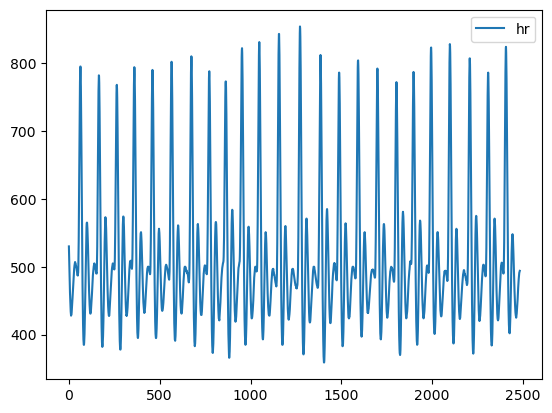

In [29]:
print(measures['bpm']) #returns BPM value
print(measures['rmssd']) # returns RMSSD HRV measure

df = pd.read_csv("data.csv", names=['hr'])
df.plot()

In [30]:
#note we need calc_freq if we want frequency-domain measures
working_data, measures = hp.process(df['hr'].values, fs, calc_freq=True)
print(measures['bpm'])
print(measures['lf/hf'])

58.898847631242
2.175384263549474


/nix/store/a7n07dfrbla2whagawpm7d61xaxqgflg-python3.11-heartpy-1.2.7/lib/python3.11/site-packages/heartpy/analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


/nix/store/a7n07dfrbla2whagawpm7d61xaxqgflg-python3.11-heartpy-1.2.7/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


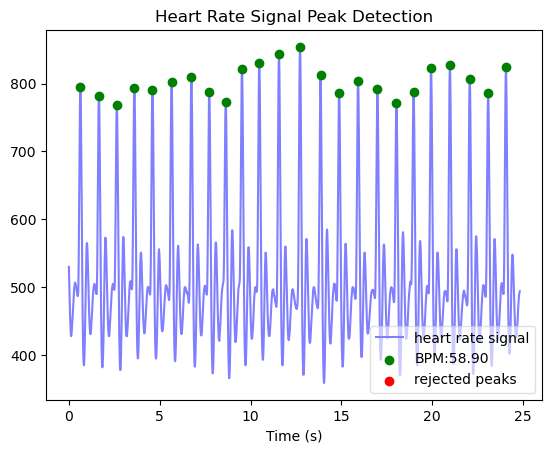

In [31]:
hp.plotter(working_data, measures)

## Analyzing and Cleaning Data

In [20]:
hrdata = hp.get_data('data2.csv', column_name='hr')
timerdata = hp.get_data('data2.csv', column_name='timer')
hp.get_samplerate_mstimer(timerdata)

116.99555416894158

/nix/store/a7n07dfrbla2whagawpm7d61xaxqgflg-python3.11-heartpy-1.2.7/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


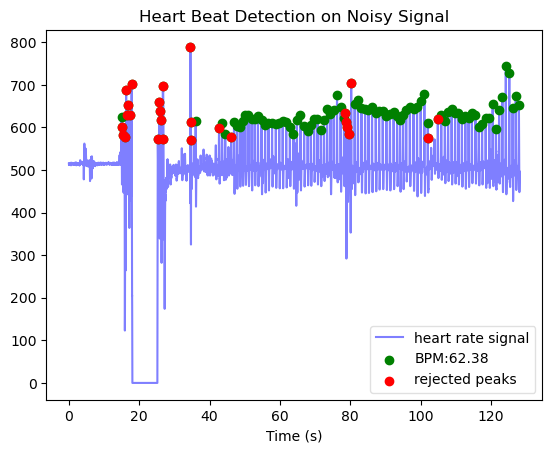

In [21]:
working_data, measures = hp.process(hrdata, hp.get_samplerate_mstimer(timerdata))

#plot with different title
hp.plotter(working_data, measures, title='Heart Beat Detection on Noisy Signal')

In [26]:
hrdata_seg = hp.get_data('data2.csv', column_name='hr')
timerdata_seg = hp.get_data('data2.csv', column_name='timer')

working_data, measures = hp.process_segmentwise(hrdata_seg, hp.get_samplerate_mstimer(timerdata_seg), segment_width = 20, segment_overlap = 0.25)

hp.segment_plotter(working_data, measures, title='Heart Rate Signal Peak Detection')